# **Conjunto de dados usado para estimar o número de mulheres editoras e suas práticas de edição na Wikipédia espanhola**


## Informação dos atributos:

**gender:** 0 (desconhecido), 1 (masculino), 2 (feminino)  
**C_api:** gênero extraído da API WikiMedia, códigos como feminino/masculino/desconhecido  
**C_man:** sexo extraído da codificação do conteúdo, codificado como 1 (masculino) / 2 (feminino) / 3 (desconhecido)  
**E_NEds:** Índice I do estrato IJ (0,1,2,3)  
**E_Bpag:** Índice J do estrato IJ (0,1,2,3)  
**firstDay:** primeira edição na Wikipédia espanhola (AAAAMMDDHHMMSS)  
**lastDay:** última edição na Wikipédia espanhola (AAAAMMDDHHMMSS)  
**NEds:** número total de edições  
**NDays:** número de dias (últimoDia-primeiroDia+1)  
**NActDays:** número de dias com edições  
**NPages:** número de páginas diferentes editadas  
**NPcreated:** número de páginas criadas  
**pagesWomen:** número de edições em páginas relacionadas a mulheres  
**wikiprojWomen:** número de edições em WikiProjects relacionadas a mulheres  
**ns_user:** número de edições no usuário do namespace  
**ns_wikipedia:** número de edições no namespace wikipedia  
**ns_talk:** número de edições no namespace talk  
**ns_userTalk:** número de edições no namespace user talk  
**ns_content:** número de edições nas páginas de conteúdo  
**weightIJ:** corrigindo o peso para o estrato IJ  
**NIJ:** número de elementos no estrato IJ  

# Citações do artigo
- *Neste artigo, nos concentramos na menor participação de mulheres em relação aos homens na Wikipédia*

- *Apenas uma pequena porcentagem de editores decide incluir seu
gênero em seu perfil, especialmente durante a criação de um novo perfil de usuário.*  

- *Como afirmado por Shane-Simpson e Gilles pie-Lynch, os editores anônimos são geralmente percebidos como homens, então a alta proporção de editores anônimos contribuindo para a Wikipédia pode exacerbar a diferença de gênero criando a ilusão (ou talvez a realidade) de um edição dominada por homens* **(será mesmo?)**

In [ ]:
import pandas as pd
pd.set_option('max_columns', None)
df = pd.read_csv('data.csv')

# Exploração dos dados

## **Conjunto de dados**

### **Definição da amostra de dados**
(datado de 1º de outubro de 2017)
- 963.591 editores registrados através de um dump da Wikipedia em espanhol
- 28.763 editores ativos
- 13.210 editores que desenvolveram sua própria página pessoal
- 5.651 editores através da extração de uma amostra  
- 4.746 páginas pessoais que não estavama vazias, removidas ou bloqueadas

**OBS: estratificaram a amostra de forma a capturar igualmente todos os níveis de engajamento para realizar uma amostra aleatória**

### **Medidas**
**GENDER:** Foi determinado pela combinação do gênero especificado no perfil do usuário (através da API MediaWiki) com o gênero extraído da codificação de contetúdo. (ex: no perfil do usuário possui expressões como "sou advogada")  
**CAPI:** Dados da API MediaWiki  
**CMAN:** Gênero calculado pela codificação de conteúdo manual descrito no artigo  

Se **CMAN** = **CAPI**, então classe = **CMAN**  
Se **CMAN** = *unknown* & **CAPI** != *unknown*, então classe = **CAPI**  
Se **CMAN** != *unknown* & **CAPI** = *unkonwn*, então classe = **CMAN**  
Caso contrário, gere um erro, pois ambos os procedimentos não concordam. 

![image](https://i.imgur.com/M0Mznc3.png "Gênero dos editores obtido pela combinação extraída da API do MediaWiki e a codificação de conteúdo descrito no artigo para os 4.746 perfis codificados")

## Criando subdatasets para realizar análises

In [ ]:
# LEMBRAR DE DELETAR AS COLUNAS E_NEds | E_Bpag | weightIJ | NIJ
# SÃO INFORMAÇÕES DA TÉCNICA DE AMOSTRAGEM DE DADOS DESCRITOS NO ARTIGO, PORTANTO, NÃO É NECESSÁRIO PARA REALIZAR A MINERAÇÃO DE DADOS

# A CLASSE OFICIAL QUE VAMOS UTILIZAR PRA DETERMINAR SE É HOMEM, MULHER OU DESCONHECIDO É O ATRIBUTO 'Gender'
df_unknown = df[df['gender'] == 0]
df_male    = df[df['gender'] == 1]
df_female  = df[df['gender'] == 2]
for (l, c), gen in [(df_male.shape, 'Masculino'), (df_female.shape, 'Feminino'), (df_unknown.shape, 'Desconhecido')]:
  print(f'há {l} linhas de dados do gênero {gen}')

há 2792 linhas de dados do gênero Masculino
há 353 linhas de dados do gênero Feminino
há 1601 linhas de dados do gênero Desconhecido


In [ ]:
df.head()

,gender,C_api,C_man,E_NEds,E_Bpag,firstDay,lastDay,NEds,NDays,NActDays,NPages,NPcreated,pagesWomen,wikiprojWomen,ns_user,ns_wikipedia,ns_talk,ns_userTalk,ns_content,weightIJ,NIJ
0,1,male,1,2,2,20170527205915,20170721044501,543,56,43,204,4,0,0,91,28,6,76,324,0.915024,978
1,0,unknown,3,3,1,20110301072441,20170731213735,2764,2345,514,722,7,0,0,100,249,183,646,1526,0.661673,477
2,1,male,1,0,2,20060907204302,20140911191722,57,2927,25,25,0,0,0,3,0,1,3,49,0.800528,664
3,1,male,1,1,2,20121003144916,20121208180528,104,67,5,66,2,0,0,20,1,2,2,78,1.027717,841
4,0,unknown,3,1,1,20070311125035,20141106121057,184,2798,27,125,0,0,0,26,10,5,24,112,0.997535,994


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df_graphics = df[['gender','NEds','NDays','NActDays','NPages','NPcreated','pagesWomen','wikiprojWomen','ns_user','ns_wikipedia','ns_talk','ns_userTalk','ns_content']]

# Correlação entre atributos

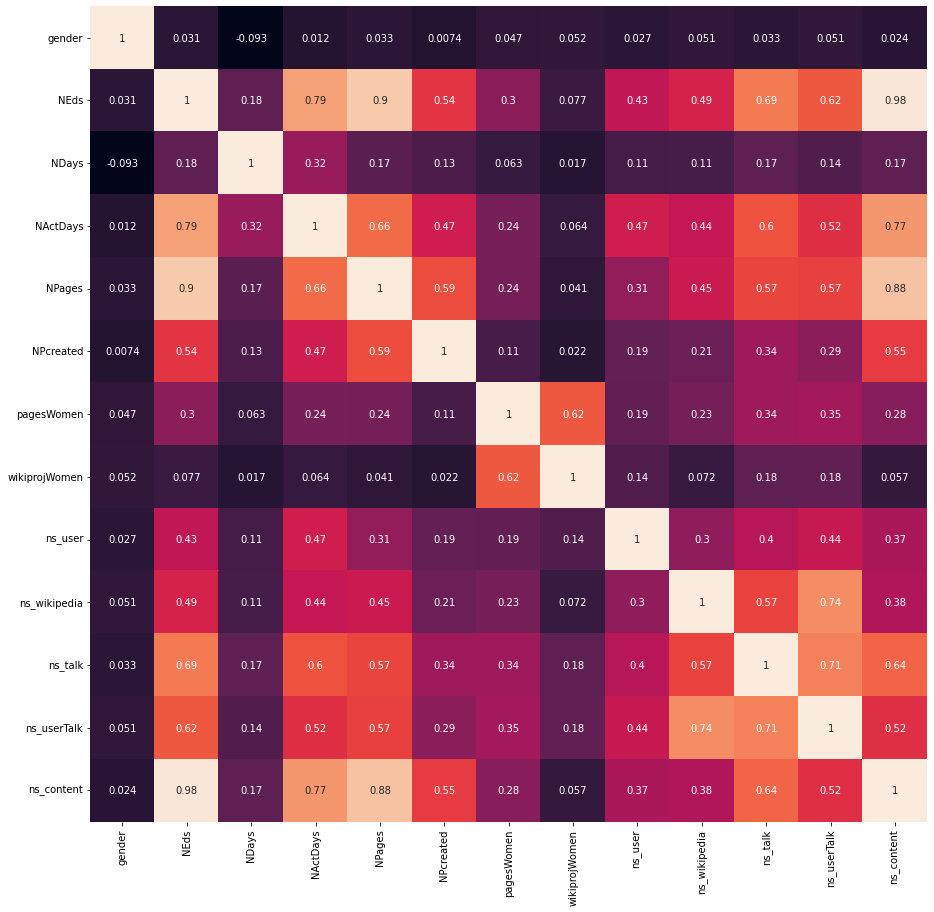

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(df_graphics.corr(), annot=True, cbar=False)

# Histograma por classes

In [ ]:
df_hist = df_graphics.rename(columns={'gender': 'Gênero'
, 'NEds': 'Número total de edições'
, 'NDays': 'Número total de dias'
, 'NActDays': 'Número de dias com edições'
, 'NPages': 'Número de páginas diferentes editadas'
, 'NPcreated': 'Número de páginas criadas'
, 'pagesWomen': 'Número de edições em páginas relacionadas a mulheres'
, 'wikiprojWomen': 'Número de edições em WikiProjects relacionadas a mulheres'
, 'ns_user': 'Número de edições no usuário do namespace'
, 'ns_wikipedia': 'Número de edições no namespace wikipedia'
, 'ns_talk': 'Número de edições no namespace talk'
, 'ns_userTalk': 'Número de edições no namespace user talk'
, 'ns_content': 'Número de edições nas páginas de conteúdo'})


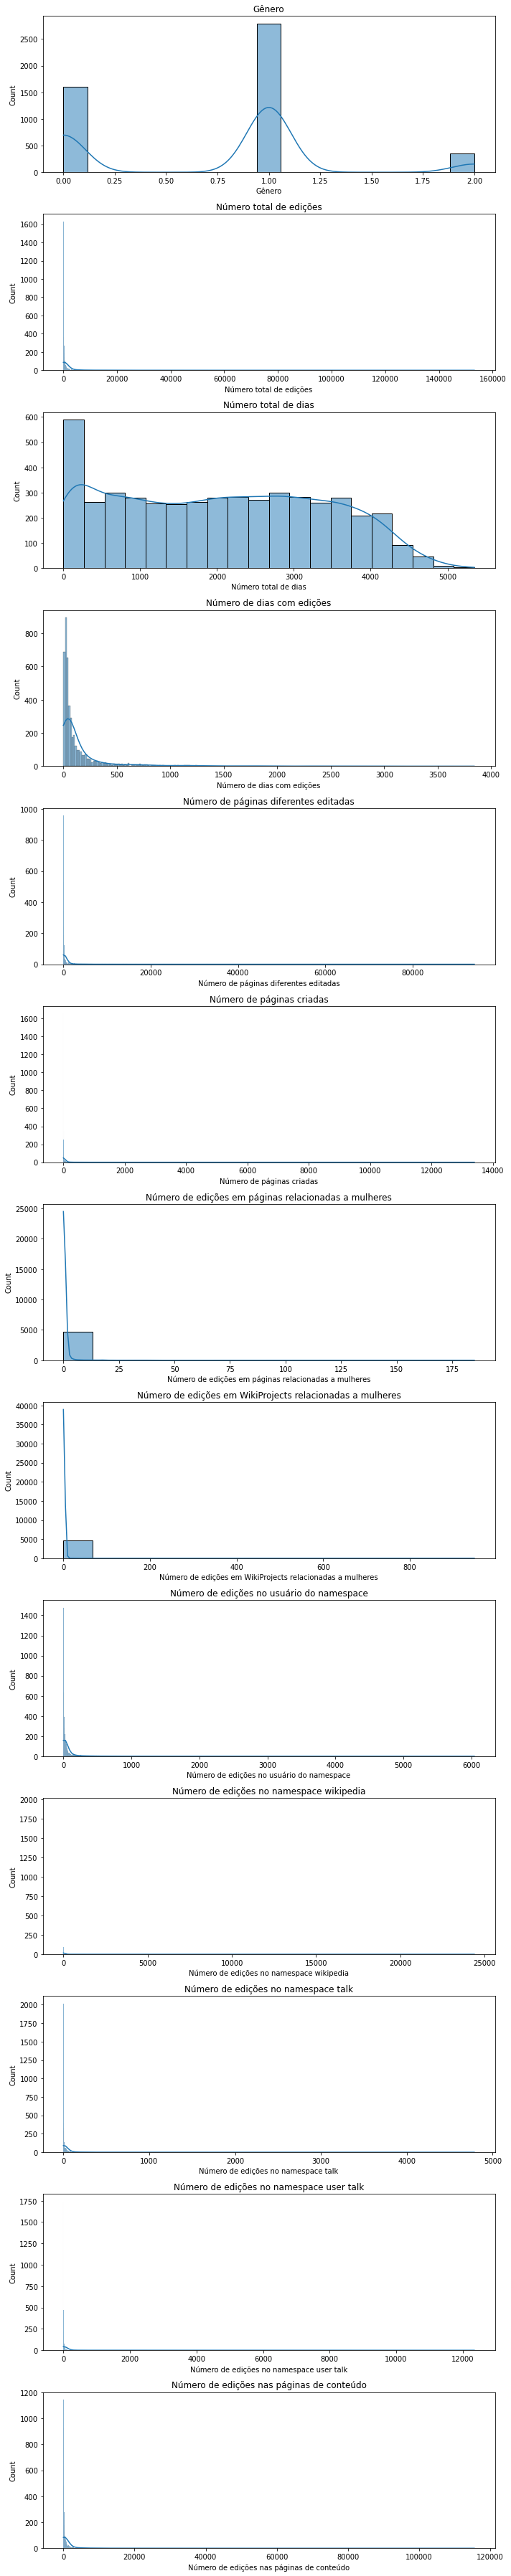

In [ ]:
#Criar um histograma com todos as colunas do nosso DF
plt.figure(figsize = (10,50))
num_columns = len(df_hist.columns)

for i, c in enumerate(df_hist.columns):
  plt.subplot(num_columns, 1, i+1) #plt.subplot(num de linhas, numero de colunas, id do gráfico)
  sns.histplot(df_hist[c], kde=True)    #além do histograma, irá gerar o KDE (Kernel Density Estimate) | gera a linha do formato da distribuição
  plt.title(c)
plt.tight_layout();

# Gráfico de Área

In [ ]:
def only_AAAAMMDD(date):
  return str(date)[:6]


df_days = df[['gender','firstDay', 'lastDay']]
df_days['firstDay'] = df_days['firstDay'].apply(only_AAAAMMDD)
df_days['lastDay']  = df_days['lastDay'].apply(only_AAAAMMDD)

In [ ]:
df_days['firstDay'] = pd.to_datetime(df_days['firstDay'], format='%Y%m')
df_days['lastDay']  = pd.to_datetime(df_days['lastDay'], format='%Y%m')

df_days_male   = df_days[df_days['gender'] == 1]
df_days_female = df_days[df_days['gender'] == 2]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


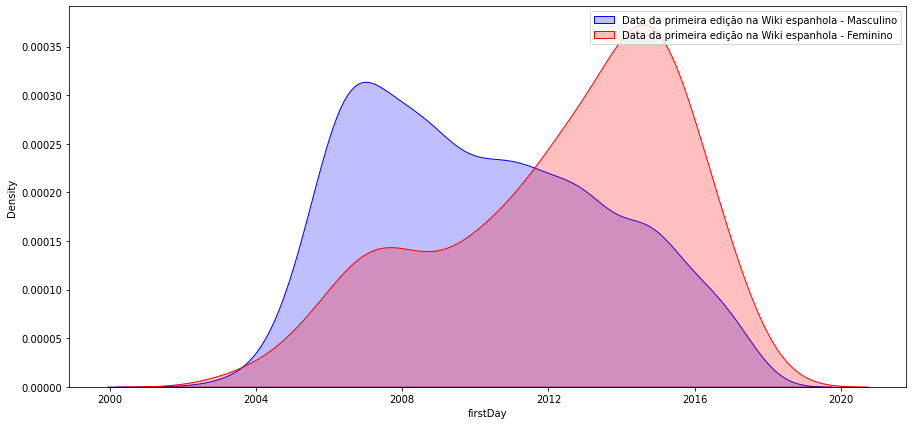

In [ ]:
plt.figure(figsize=(15,7))
sns.kdeplot(df_days_male['firstDay'], label='Data da primeira edição na Wiki espanhola - Masculino', color='b', shade=True) 
sns.kdeplot(df_days_female['firstDay'], label='Data da primeira edição na Wiki espanhola - Feminino', color='r', shade=True)
plt.legend()

# Contagem de edições agrupado por gênero

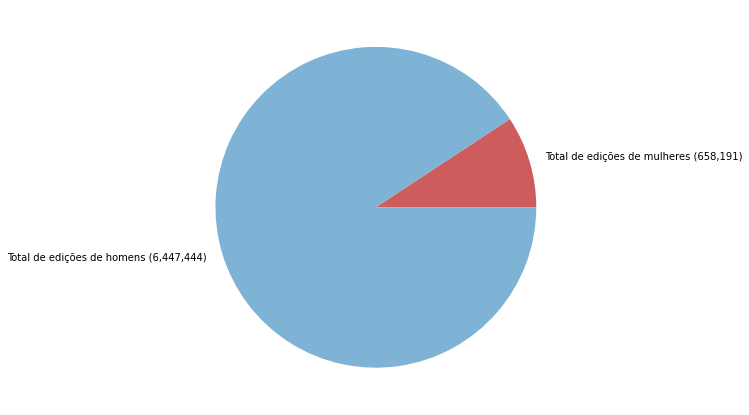

In [ ]:
data = [df_female['NEds'].sum(), df_male['NEds'].sum()]
tM, tF = "{:,}".format(data[1]), "{:,}".format(data[0])
labels = [f'Total de edições de mulheres ({tF})', f'Total de edições de homens ({tM})']
colors= ['#CD5C5C', '#7FB3D5']
 
fig = plt.figure(figsize=(10, 10))
patches, texts = plt.pie(data, labels=labels, colors=colors)

plt.tight_layout()
plt.show()

In [ ]:
qtd_F, qtd_M = df_female['gender'].count(), df_male['gender'].count()
tF, tM = df_female['NEds'].sum(), df_male['NEds'].sum()

print(f'Os editores do gênero feminino apresentam em média {round(tF/qtd_F, 1)} páginas editadas\n')
print(f'Os editores do gênero masculino apresentam em média {round(tM/qtd_M, 1)} páginas editadas')

Os editores do gênero feminino apresentam em média 1864.6 páginas editadas

Os editores do gênero masculino apresentam em média 2309.3 páginas editadas


# Contagem de instâncias por classe

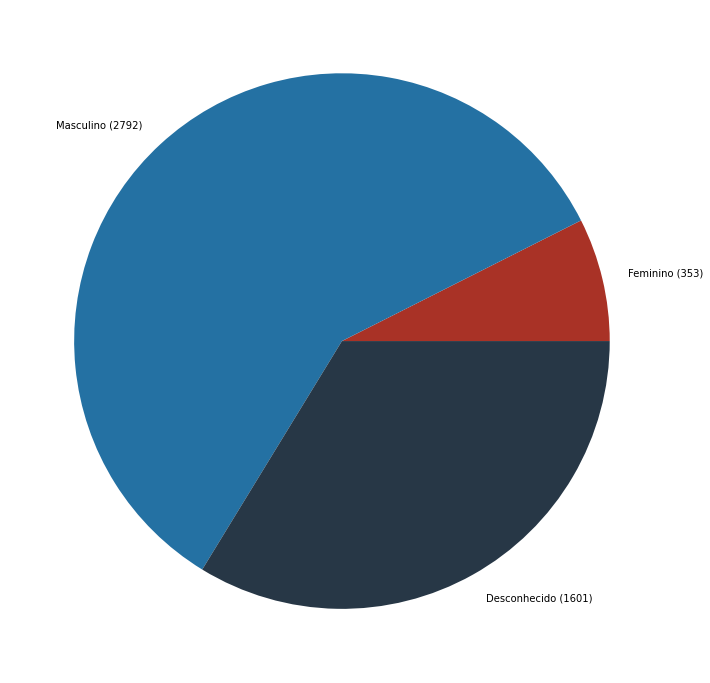

In [ ]:
femaleCount, maleCount, unknownCount = df_female['gender'].count(), df_male['gender'].count(), df_unknown['gender'].count()
data = [femaleCount, maleCount, unknownCount]
labels = [f'Feminino ({femaleCount})', f'Masculino ({maleCount})', f'Desconhecido ({unknownCount})' ]
colors= ['#A93226', '#2471A3', '#273746']
 
fig = plt.figure(figsize=(10, 10))
patches, texts = plt.pie(data, labels=labels, colors=colors)

plt.tight_layout()
plt.show()